In [1]:
import warnings

warnings.filterwarnings('ignore')

1.因子：MACD和大阳线（大阴线）

In [2]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '4H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props)
print(time()-start)

4.785271883010864


In [3]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv = HFDataView()

In [4]:
dv.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


In [5]:
import matplotlib.pyplot as plt

def plot_chart(close,alpha):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,8))
    ax.plot(close.iloc[-250:])
    ax1.plot(alpha.iloc[-250:])
    ax1.hlines(0, alpha.index[-250:],alpha.index[-1],alpha=0.3)
    # plt.savefig('good')
    plt.show()

In [6]:
Diff_J = dv.add_formula('Diff_J',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)" , add_data=True)
DEA_J = dv.add_formula('DEA_J', "Ta('EMA',0,0,0,0,Diff_J,0,9)", add_data=True)

In [7]:
MACD=dv.add_formula('MACD','Diff_J-DEA_J', add_data=True)

In [8]:
macd_plot = dv.get_ts('MACD',date_type='datetime')
close= dv.get_ts('close',date_type='datetime')

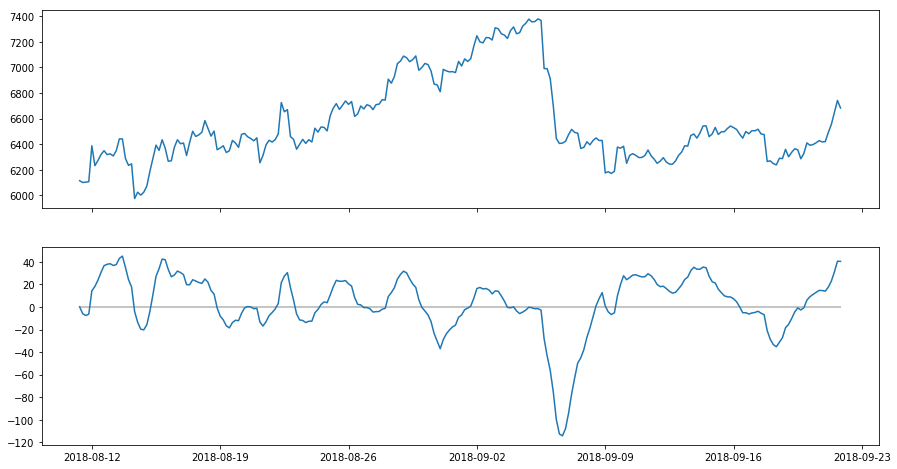

In [9]:
plot_chart(close, macd_plot)

研究报告：图形为MACD因子指标，由DIFF-DEA获得，其中DIFF是收盘价的短期指数平滑移动平均线与收盘价长期指数平滑移动平均线的差，DIFF与收盘价格趋于同向变化，DIFF可以理解为反应短期相对于长期收盘价的走势；DEA是对DIFF的数值再做指数平滑移动平均处理，也可以理解为DIFF的均值；DIFF与DEA的差MACD因子，是围绕0轴上下波动，因子>0时，DIFF向上金叉DEA，反应短期趋势往上；反之，因子0时为买入信号，MACD<0时为卖出信号。

In [10]:
data4H = Time_dict.set_index('datetime')

In [11]:
import matplotlib.pyplot as plt
import mpl_finance as mpf

def draw_candle(candle, scatterX, scatterY):
    fig, (ax, ax1) = plt.subplots(2,1,sharex=True, figsize=(18,10))
    ax.grid(True)
    mpf.candlestick_ohlc(ax, candle, width=0.3, colorup='r', colordown='g',alpha=1.0)
    ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.xaxis_date ()
    ax1.bar(data4H.index, data4H.volume)
    plt.show()

In [12]:
Big_Up = dv.add_formula('Big_Up','If((close/open>1.02) && (high/low<(close/open+0.02)), 100, 0)', add_data=True)

In [13]:
Big_Up[Big_Up['BTCUSDT:binance']==100]

symbol,BTCUSDT:binance
trade_date,
20180605200000,100.0
20180611160000,100.0
20180614080000,100.0
20180615000000,100.0
20180617000000,100.0
20180619000000,100.0
20180625000000,100.0
20180630040000,100.0
20180702200000,100.0


In [14]:
dataBigUp = dv.get_ts('Big_Up', date_type='datetime')

In [15]:
scatterBigUpX = dataBigUp[dataBigUp['BTCUSDT:binance']==100].index

In [16]:
scatterBigUpY = data4H.loc[scatterBigUpX].low-100

In [17]:
from matplotlib.pylab import date2num

data4H['candleTime'] = list(map(date2num, data4H.index))
candle = data4H.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values

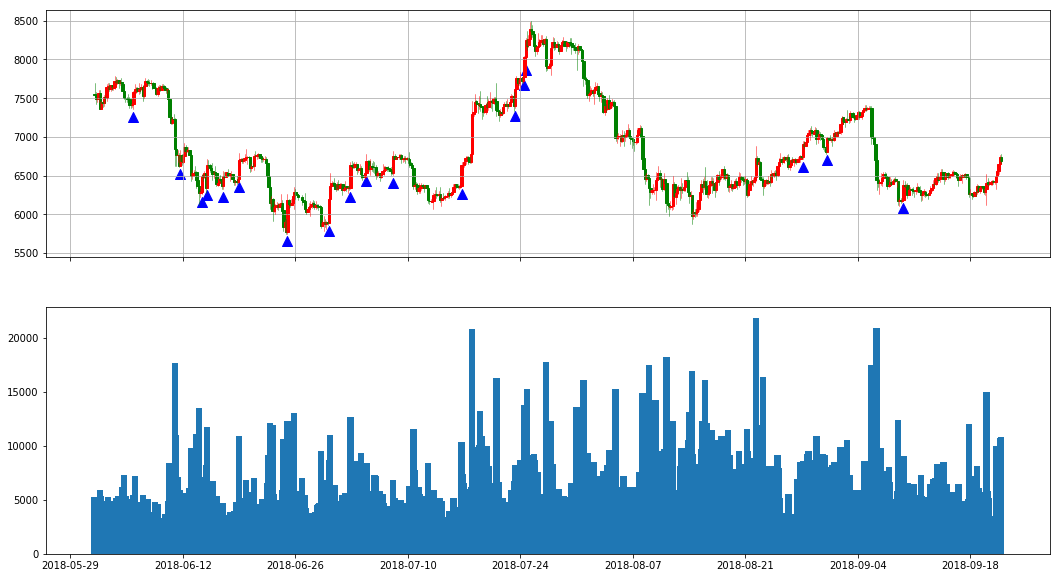

In [18]:
draw_candle(candle, scatterBigUpX, scatterBigUpY)

研究报告：以大阳线作为因子（也可考虑大阴线），反应的是短期的力量，也是一种短期趋势表现，出现大阳线时，表明多方实力更强，多数情况下会出现一波上涨趋势。出现大阴线情况则相反。并且往往伴随大阳线或大阴线，成交量会明显放大，更能反应多空角逐结果。所以假设大阳线为买入信号，大阴线为卖出信号。

2.因子：WVAD

In [19]:
def plot_chart2(x,y,z):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,8))
    ax.plot(x.iloc[-250:])
    ax1.plot(y.iloc[-250:])
    ax1.plot(z.iloc[-250:])
    # plt.savefig('good')
    plt.show()

In [20]:
Wvad_j = dv.add_formula('Wvad_j', "Ts_Sum(((close-open)/(high-low))*volume,24)" ,
                             add_data=True)
Ma6wvad_j = dv.add_formula('Ma6wvad_j', 'Ts_Mean(Wvad_j,6)',add_data=True)
Ma24wvad_j = dv.add_formula('Ma24wvad_j', 'Ts_Mean(Wvad_j,24)', add_data=True)

In [21]:
Ma6wvad_jplot=  dv.get_ts('Ma6wvad_j', date_type='datetime')
Ma24wvad_jplot=  dv.get_ts('Ma24wvad_j', date_type='datetime')
close = dv.get_ts('close', date_type='datetime')

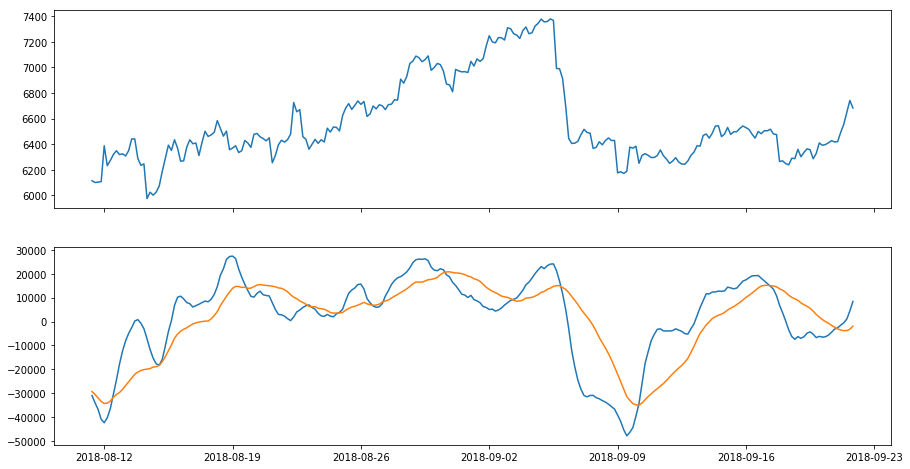

In [22]:
plot_chart2(close,Ma6wvad_jplot,Ma24wvad_jplot)

研究报告：WVAD指标反应的是多空双方的角逐，且加入了成交量来反应爆发力，但未考虑跳空因素，所以跳空因素需另外分析。WVAD指标本身是随零轴上下波动，指标在零轴上方，表明短期上涨动力更强，反之下跌动力更强，对WVAD做短期和长期的移动平均后，反应短期和长期的多空力量，两线都在零轴上方为多方强，零轴下方为空方强，短期线上穿长期线（金叉），表明短期多方强。因子假设：长期线上穿0轴，并且出现短期金叉长期时做多，0轴上方出现M背离时平仓，背离死叉时做空，且出现第一次金叉时平空单。反之同理。